## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   8.903750   687.540413  0.362288  1.603238  1.621565
1   6.615751   586.286175  0.259575  2.068791  1.434208
2  42.445912   360.639445  0.002817  5.877997  0.057355
3  15.144176  1045.782926  0.024616  8.760248  1.164081
4  23.520380   348.316569  0.349879  7.833035  1.490405


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9344465	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9273401	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9200496	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9116598	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9045607	total: 71.6ms	remaining: 14.3s
5:	learn: 0.8988915	total: 72.3ms	remaining: 12s
6:	learn: 0.8890901	total: 72.7ms	remaining: 10.3s
7:	learn: 0.8797096	total: 73.2ms	remaining: 9.08s
8:	learn: 0.8692448	total: 73.7ms	remaining: 8.12s
9:	learn: 0.8598071	total: 74.1ms	remaining: 7.34s
10:	learn: 0.8530429	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8431107	total: 74.9ms	remaining: 6.17s
12:	learn: 0.8371844	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8273419	total: 76ms	remaining: 5.35s
14:	learn: 0.8192105	total: 76.4ms	remaining: 5.02s
15:	learn: 0.8122625	total: 77ms	remaining: 4.73s
16:	learn: 0.8039133	total: 77.4ms	remaining: 4.48s
17:	learn: 0.7976943	total: 77.9ms	remaining: 4.25s
18:	learn: 0.7937703	total: 78.6ms	remaining: 4.06

82:	learn: 0.4801755	total: 107ms	remaining: 1.18s
83:	learn: 0.4771224	total: 107ms	remaining: 1.17s
84:	learn: 0.4728470	total: 108ms	remaining: 1.16s
85:	learn: 0.4692184	total: 108ms	remaining: 1.15s
86:	learn: 0.4653742	total: 109ms	remaining: 1.14s
87:	learn: 0.4598361	total: 109ms	remaining: 1.13s
88:	learn: 0.4569192	total: 110ms	remaining: 1.12s
89:	learn: 0.4534486	total: 110ms	remaining: 1.11s
90:	learn: 0.4506695	total: 111ms	remaining: 1.1s
91:	learn: 0.4484134	total: 111ms	remaining: 1.09s
92:	learn: 0.4447729	total: 111ms	remaining: 1.08s
93:	learn: 0.4414124	total: 112ms	remaining: 1.08s
94:	learn: 0.4382432	total: 112ms	remaining: 1.07s
95:	learn: 0.4355208	total: 112ms	remaining: 1.06s
96:	learn: 0.4329094	total: 113ms	remaining: 1.05s
97:	learn: 0.4301280	total: 113ms	remaining: 1.04s
98:	learn: 0.4262139	total: 114ms	remaining: 1.03s
99:	learn: 0.4239662	total: 114ms	remaining: 1.03s
100:	learn: 0.4207888	total: 115ms	remaining: 1.02s
101:	learn: 0.4183609	total: 11

266:	learn: 0.1662209	total: 186ms	remaining: 512ms
267:	learn: 0.1653360	total: 187ms	remaining: 511ms
268:	learn: 0.1644284	total: 187ms	remaining: 509ms
269:	learn: 0.1635880	total: 188ms	remaining: 508ms
270:	learn: 0.1626845	total: 188ms	remaining: 506ms
271:	learn: 0.1619841	total: 189ms	remaining: 505ms
272:	learn: 0.1611582	total: 189ms	remaining: 504ms
273:	learn: 0.1602903	total: 189ms	remaining: 502ms
274:	learn: 0.1594806	total: 190ms	remaining: 501ms
275:	learn: 0.1587426	total: 190ms	remaining: 500ms
276:	learn: 0.1578311	total: 191ms	remaining: 498ms
277:	learn: 0.1569709	total: 192ms	remaining: 497ms
278:	learn: 0.1562016	total: 192ms	remaining: 496ms
279:	learn: 0.1554909	total: 192ms	remaining: 495ms
280:	learn: 0.1547300	total: 193ms	remaining: 493ms
281:	learn: 0.1543468	total: 193ms	remaining: 492ms
282:	learn: 0.1535502	total: 194ms	remaining: 491ms
283:	learn: 0.1528075	total: 194ms	remaining: 490ms
284:	learn: 0.1518674	total: 195ms	remaining: 488ms
285:	learn: 

503:	learn: 0.0735169	total: 287ms	remaining: 283ms
504:	learn: 0.0734043	total: 288ms	remaining: 282ms
505:	learn: 0.0730954	total: 288ms	remaining: 282ms
506:	learn: 0.0729836	total: 289ms	remaining: 281ms
507:	learn: 0.0726807	total: 290ms	remaining: 280ms
508:	learn: 0.0725697	total: 290ms	remaining: 280ms
509:	learn: 0.0725060	total: 290ms	remaining: 279ms
510:	learn: 0.0722134	total: 291ms	remaining: 278ms
511:	learn: 0.0721039	total: 291ms	remaining: 277ms
512:	learn: 0.0720240	total: 292ms	remaining: 277ms
513:	learn: 0.0719158	total: 292ms	remaining: 276ms
514:	learn: 0.0718535	total: 292ms	remaining: 275ms
515:	learn: 0.0715615	total: 293ms	remaining: 275ms
516:	learn: 0.0714541	total: 293ms	remaining: 274ms
517:	learn: 0.0713763	total: 293ms	remaining: 273ms
518:	learn: 0.0710907	total: 294ms	remaining: 272ms
519:	learn: 0.0709839	total: 294ms	remaining: 272ms
520:	learn: 0.0708437	total: 295ms	remaining: 271ms
521:	learn: 0.0707840	total: 295ms	remaining: 270ms
522:	learn: 

690:	learn: 0.0537346	total: 367ms	remaining: 164ms
691:	learn: 0.0536528	total: 368ms	remaining: 164ms
692:	learn: 0.0534760	total: 368ms	remaining: 163ms
693:	learn: 0.0534181	total: 368ms	remaining: 162ms
694:	learn: 0.0533611	total: 369ms	remaining: 162ms
695:	learn: 0.0531889	total: 369ms	remaining: 161ms
696:	learn: 0.0531327	total: 370ms	remaining: 161ms
697:	learn: 0.0531030	total: 370ms	remaining: 160ms
698:	learn: 0.0529312	total: 371ms	remaining: 160ms
699:	learn: 0.0529020	total: 371ms	remaining: 159ms
700:	learn: 0.0527339	total: 371ms	remaining: 158ms
701:	learn: 0.0527051	total: 372ms	remaining: 158ms
702:	learn: 0.0526418	total: 372ms	remaining: 157ms
703:	learn: 0.0524769	total: 372ms	remaining: 157ms
704:	learn: 0.0524074	total: 373ms	remaining: 156ms
705:	learn: 0.0523387	total: 374ms	remaining: 156ms
706:	learn: 0.0520842	total: 375ms	remaining: 156ms
707:	learn: 0.0520166	total: 376ms	remaining: 155ms
708:	learn: 0.0519498	total: 376ms	remaining: 154ms
709:	learn: 

932:	learn: 0.0307076	total: 469ms	remaining: 33.7ms
933:	learn: 0.0306499	total: 469ms	remaining: 33.2ms
934:	learn: 0.0305517	total: 470ms	remaining: 32.7ms
935:	learn: 0.0305101	total: 470ms	remaining: 32.2ms
936:	learn: 0.0303657	total: 471ms	remaining: 31.6ms
937:	learn: 0.0303032	total: 471ms	remaining: 31.1ms
938:	learn: 0.0302505	total: 472ms	remaining: 30.6ms
939:	learn: 0.0301347	total: 472ms	remaining: 30.1ms
940:	learn: 0.0300974	total: 473ms	remaining: 29.6ms
941:	learn: 0.0300018	total: 473ms	remaining: 29.1ms
942:	learn: 0.0299013	total: 473ms	remaining: 28.6ms
943:	learn: 0.0298295	total: 474ms	remaining: 28.1ms
944:	learn: 0.0297791	total: 474ms	remaining: 27.6ms
945:	learn: 0.0296857	total: 475ms	remaining: 27.1ms
946:	learn: 0.0296498	total: 475ms	remaining: 26.6ms
947:	learn: 0.0295799	total: 476ms	remaining: 26.1ms
948:	learn: 0.0294410	total: 476ms	remaining: 25.6ms
949:	learn: 0.0294058	total: 476ms	remaining: 25.1ms
950:	learn: 0.0293712	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

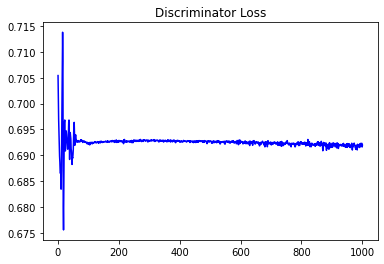

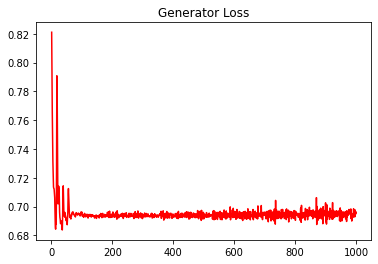

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16153454076950516


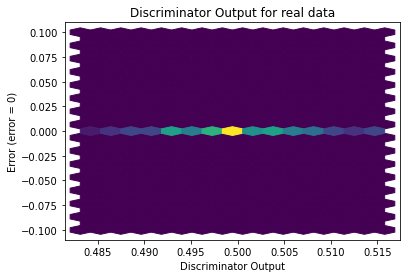

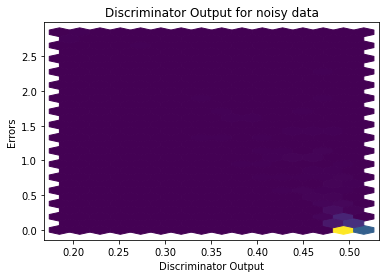

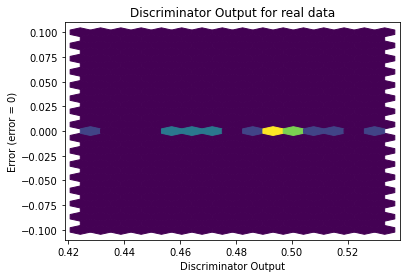

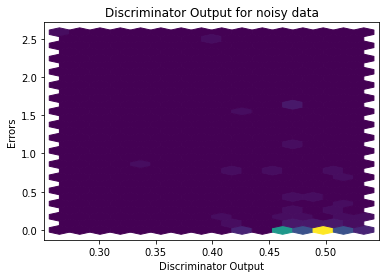

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


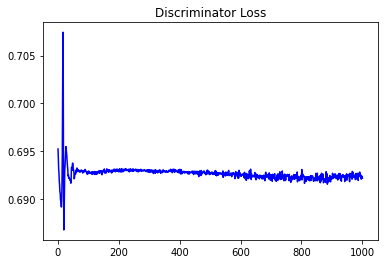

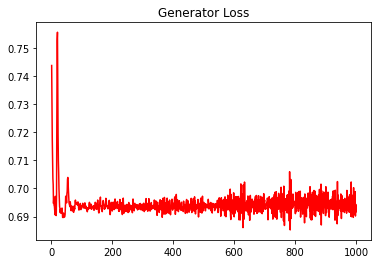

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16318308100849618


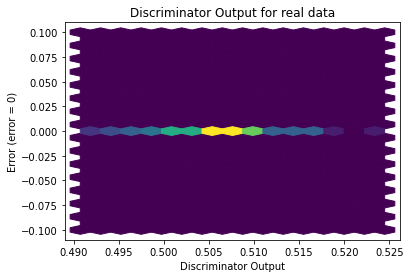

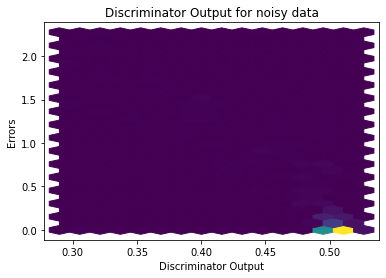

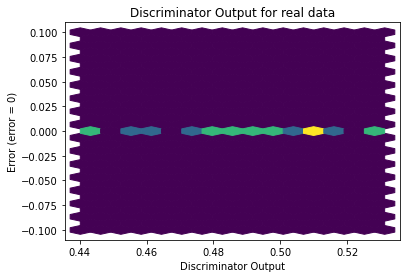

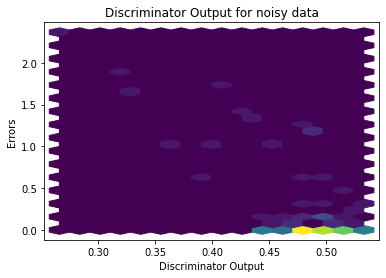

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6494]], requires_grad=True)
